References:

1) https://www.neuron.yale.edu/neuron/static/new_doc/programming/hocsyntax.html

2) https://www.neuron.yale.edu/neuron/static/new_doc/programming/python.html

3) https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html

4) https://www.geeksforgeeks.org/single-neuron-neural-network-python/

5) https://github.com/piazentin/ksets

6) AP - https://www.moleculardevices.com/applications/
patch-clamp-electrophysiology/what-action-potential#gref

7) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/network/netcon.html

8) http://neupy.com/apidocs/neupy.algorithms.associative.hebb.html

9) https://qbi-software.github.io/NEURON-tutorial/lessons/network

10) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html

11) http://www.cnel.ufl.edu/courses/EEL6814/chapter6.pdf

12) https://www.slideshare.net/mentelibre/hebbian-learning

13) http://www.diva-portal.org/smash/get/diva2:1089220/FULLTEXT02

In [1]:
pip install neuron

     |████████████████████████████████| 12.6 MB 197 kB/s 


## Move nvninmodl files to curr_dir (for ORN)


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !ls /content/drive/My\ Drive/nrnmodl/
# !cp /content/drive/My\ Drive/nrnmodl/* /content

In [4]:
# !pwd

In [5]:
# !nrnivmodl

**Stage 1:Importing required libraries**

In [6]:
from neuron import h                     #.h is a HOC object instanced & gui from neuron can also be imported 
from neuron.units import ms,mV
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation
  
import matplotlib.pyplot as plt1

import numpy as np
from scipy.stats import poisson
import seaborn as sb

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

# import logging
# logging.basicConfig(level=logging.DEBUG)

# size=int(input('Enter no.of sets  '))
size = 30

### **Stage 2:Making a Neuron with specific properties**

In [7]:
# #This is the ORN class
# class ORN:
#     def __init__(self,gid,M):
#         self._gid = gid
#         self.M = M+1

#         # Set morphology
#         self.soma = h.Section(name='soma', cell=self)
#         self.axon = h.Section(name='axon', cell=self)
#         self.dendArr = [h.Section(name="dend%d" % i, cell=self) for i in range(1)]
#         self.dendriticknobArr = [h.Section(name="dendriticknob%d" % i, cell=self) for i in range(1)]
#         self.ciliumArr = [h.Section(name="cilium%d" % i, cell=self) for i in range(1)]

#         self.axon.connect(self.soma(0),0)
#         self.dendArr[0].connect(self.soma(1),0)
#         self.dendriticknobArr[0].connect(self.dendArr[0](0),1)
        
#         self.dendriticknobArr[0].nseg = 1
#         self.dendriticknobArr[0].diam = 2
#         self.dendriticknobArr[0].L = 2
#         self.dendriticknobArr[0].insert('ciliaProp')

#         for i in range(1):
#             self.ciliumArr[i].connect(self.dendriticknobArr[0](1),0)

# #         self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
# #         self.spike_times = h.Vector()
# #         self._spike_detector.record(self.spike_times)
# #         self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
# #         self._ncs = [] 

#         # anatomical and biophysical properties
#         self.soma.nseg = 1 
#         self.soma.L = 9 # micrometer
#         self.soma.diam = 6
#         self.soma.insert('hh1')

#         self.axon.nseg = 1
#         self.axon.L = 100
#         self.axon.diam = 1
#         self.axon.insert('hh')
    
#         self.dendArr[0].nseg = 1
#         self.dendArr[0].L = 50
#         self.dendArr[0].diam = 1.5
#         self.dendArr[0].insert('dendProp')
#         # self.dendArr[0].e_pas = -65
#         # self.dendArr[0].g_pas = 0.001

#         for i in range(1):
#             self.ciliumArr[i].nseg = 1
#             self.ciliumArr[i].diam = 0.28
#             self.ciliumArr[i].L = 200
#             self.ciliumArr[i].insert("blr300%d" % i)

#         self.tstop = 6
        
#     def __repr__(self):
#         return 'Set [{}]_ORNcell [{}]'.format(self.M,self._gid)
#         #This shows how to represent each part when called upon

In [8]:
#This class makes one cell neuron(soma,axon,dendrite)
class MCELL:
    def __init__(self, gid, M):
        self._gid = gid #Neuron no.
        self.M = M+1
        #Setting morphology
        #Creating soma,dend and axon
        self.soma=h.Section(name='soma',cell=self)
        self.dend=h.Section(name='dend',cell=self)
        self.axon=h.Section(name='axon',cell=self)
        
        self.all = [self.axon, self.soma, self.dend] 
        #list of all the sections in the cell.
        #We could explicitly specify the connection location  by self.dend.connect(self.soma(0.5))
        
        self.dend.connect(self.soma,1,0)
        self.axon.connect(self.soma,0,0)
        
        self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
        self._ncs = [] 
        
        #Defining geometry of soma
        self.soma.L = 18.8 
        self.soma.diam = 18.8 #in microns
        self.soma.nseg = 1                  #No. of segments
        
        #Defining geometry of dend
        self.dend.nseg = 1                  #No. of segments
        self.dend.L = 701.9                 #in microns
        self.dend.diam = 3.18                #in microns
        self.dendexcisyn = h.ExpSyn(self.dend(0.5))
        self.dendexcisyn.tau = 1 *ms   # tau is decay time constant
        self.dendexcisyn.e = 0    # reversal potential
        
        #Defining geometry for axon
        self.axon.nseg = 1
        self.axon.L = 152
        self.axon.diam = 3.18
        
        #Setting biophysics
        for sec in self.all:                                                  
            sec.Ra = 123    # Axial resistance in Ohm * cm                    
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        self.soma.insert('hh')            #Inserting HH neurons
        self.axon.insert('hh')
        self.dend.insert('pas')
        for seg in self.dend:                               
            seg.pas.g = 0.001  # Passive conductance in S/cm2 
            seg.pas.e = -78    # Leak reversal potential mV
        
    def __repr__(self):
        return 'Set [{}]_Mcell [{}]'.format(self.M,self._gid)
        #This shows how to represent each part when called upon

### **Uniform Distribution**

In [9]:
# from scipy.stats import uniform
# label=['Pdf','Histogram']
low, high = 0.05, 0.1
uniform_distribution = np.random.uniform(low, high,2*size-1)
print(uniform_distribution)
# Create the bins and histogram
# count, bins, ignored = plt1.hist(uniform_distribution,10)
# #plt1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt1.plot(bins,uniform.pdf(bins))
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.grid()
# plt1.show()
# print(uniform_distribution)

[0.08973494 0.06343923 0.08819897 0.05260418 0.05817606 0.07762186
 0.09424579 0.08788047 0.0839474  0.07941145 0.07420946 0.05765619
 0.08398786 0.07534169 0.08859966 0.07476264 0.08550335 0.094538
 0.09715068 0.09805683 0.07575172 0.07109023 0.09176883 0.07546926
 0.0593554  0.06848958 0.08900187 0.0747572  0.08512195 0.05391907
 0.05539942 0.06842732 0.06465242 0.0829822  0.05764698 0.0921811
 0.0609624  0.05732283 0.05645733 0.09116008 0.05613802 0.08276733
 0.06714674 0.08105091 0.05955788 0.09295125 0.07790207 0.05202378
 0.07661391 0.08167463 0.05454212 0.07720235 0.08447837 0.0526877
 0.05895473 0.06318215 0.09663737 0.09223801 0.09626783]


In [10]:
weights = uniform_distribution
print(weights)

[0.08973494 0.06343923 0.08819897 0.05260418 0.05817606 0.07762186
 0.09424579 0.08788047 0.0839474  0.07941145 0.07420946 0.05765619
 0.08398786 0.07534169 0.08859966 0.07476264 0.08550335 0.094538
 0.09715068 0.09805683 0.07575172 0.07109023 0.09176883 0.07546926
 0.0593554  0.06848958 0.08900187 0.0747572  0.08512195 0.05391907
 0.05539942 0.06842732 0.06465242 0.0829822  0.05764698 0.0921811
 0.0609624  0.05732283 0.05645733 0.09116008 0.05613802 0.08276733
 0.06714674 0.08105091 0.05955788 0.09295125 0.07790207 0.05202378
 0.07661391 0.08167463 0.05454212 0.07720235 0.08447837 0.0526877
 0.05895473 0.06318215 0.09663737 0.09223801 0.09626783]


## **Stage 3.5 : Make different sorts of inputs**

In [11]:
def stairstep(lo: float, hi: float, duration: int, max_duration: int = 200) -> list:
    # duration and max_duration are in ms
    return [hi if i < duration else lo for i in range(0,max_duration)]
    # return [0+0.8*(i/duration) if i < duration else 0 for i in range(0,max_duration)]

**Stage 4: Coupling a neuron according to Freeman's KI Set with the weights given above**

In [12]:
#Gives one 2 coupled neuron using freeman's topology in olfactory bulb
class CONNECTING:

    def __init__(self,M,weights,delay1=1,delay2=1):
        wMM=weights[0]
        
        self.M = M #Set no.
        self.th = -70
        self.maindelay = 0
        
        #Making 2 neurons
        self.cells=[]
        self.P1=MCELL(1,self.M)
        self.P2=MCELL(2,self.M)
        self.cells.append(self.P1)
        self.cells.append(self.P2)
        
        #Giving current pulse
        self.stim = h.IClamp(self.P1.dend(0.5))  #P1.soma to P1.dend
        self.stim.delay = 1   #in ms
        self.stim.dur = 100     #in ms
        self.stim.amp = 0.9 #in nA      # from 0.2 to 1.8 
        
                
        #Connecting P1 to P2
        self.nc1 = h.NetCon(self.P1.axon(0.5)._ref_v,self.P2.dendexcisyn,sec=self.P1.axon)   # P1.axon to P2.dend
        self.nc1.weight[0] = weights[M]
        print("mutual weight is ", weights[M])
        self.nc1.delay = 0.1 #tP1P2
        self.nc1.threshold = self.th
        
        #Connecting P2 to P1
        self.nc2 = h.NetCon(self.P2.axon(0.5)._ref_v,self.P1.dendexcisyn,sec=self.P2.axon)    #P2.axon to P1.dend
        self.nc2.weight[0] = weights[M]
        self.nc2.delay = 0.3 #tP2P1
        self.nc2.threshold = self.th    

            

**Stage 5: Laterally connect each set of 2 coupled neurons according to Freeman's KI Set**

In [13]:
class LATERAL:

    def __init__(self,N,weights):
        wMML=weights
        #wMML=0.1
        
        self.N = N
        self.th = -70
        self.maindelay = 20
        self.sets = []
        c=0
        for i in range(N):
            self.sets.append(CONNECTING(i,weights))
        
        self.netConArr = []
        for r in range(0,N-1):
          #Connecting P1[0] to P1[1]
          # make a list for easier access
          netConList = []
          netConList.append(h.NetCon(self.sets[r].P1.axon(0.5)._ref_v, self.sets[r+1].P1.dendexcisyn,sec=self.sets[r].P1.axon))
          netConList[0].weight[0]  = wMML[r+N]
          print("Lateral weight is", wMML[r+N])
          netConList[0].delay = self.maindelay+1
          netConList[0].threshold = self.th

          netConList.append(h.NetCon(self.sets[r+1].P1.axon(0.5)._ref_v, self.sets[r].P1.dendexcisyn, sec=self.sets[r+1].P1.axon))
          netConList[1].weight[0] = wMML[r+N]
          netConList[1].delay = self.maindelay+2
          netConList[1].threshold = self.th

          self.netConArr.append(netConList)

          # exec(f"self.nc11_{r} = h.NetCon(getattr(self.sets[r].P1.axon(0.5), '_ref_v'), self.sets[1+r].P1.dendexcisyn,sec=self.sets[r].P1.axon)")
          # exec(f"self.nc11_{r}.weight[0] = wMML[r+N]")
          # print("lateral weight is", wMML[r+N])
          # exec(f"self.nc11_{r}.delay = self.maindelay+1")
          # exec(f"self.nc11_{r}.threshold = self.th")
          # exec(f"self.nc12_{r} = h.NetCon(getattr(self.sets[1+r].P1.axon(0.5), '_ref_v'), self.sets[r].P1.dendexcisyn,sec=self.sets[1+r].P1.axon)")
          # exec(f"self.nc12_{r}.weight[0] = wMML[r+N]")
          # #print(wMML[r+N])
          # exec(f"self.nc12_{r}.delay = self.maindelay+2")
          # exec(f"self.nc12_{r}.threshold = self.th")

**Stage 6: Input the number of 2 coupled sets required (which are all laterally connected)**

In [14]:
#Give N value to get N no. of 2 coupled neurons laterally connected
given_input_from_user =size #  int(input('Enter the number of 2 coupled sets required: '))
L1=LATERAL(given_input_from_user,weights)
print(weights)

mutual weight is  0.08973494248955968
mutual weight is  0.06343923261996112
mutual weight is  0.08819896691006004
mutual weight is  0.05260417507675311
mutual weight is  0.05817606415304528
mutual weight is  0.0776218566184385
mutual weight is  0.0942457936094599
mutual weight is  0.08788047133345579
mutual weight is  0.08394739534664097
mutual weight is  0.07941145427732281
mutual weight is  0.07420945812730206
mutual weight is  0.057656194163628195
mutual weight is  0.08398786472448491
mutual weight is  0.0753416862936047
mutual weight is  0.08859966254547977
mutual weight is  0.07476264253712918
mutual weight is  0.08550335484735029
mutual weight is  0.09453799608513642
mutual weight is  0.0971506785746846
mutual weight is  0.09805682646083853
mutual weight is  0.07575171575207419
mutual weight is  0.07109023385386207
mutual weight is  0.09176883109883546
mutual weight is  0.07546926208329836
mutual weight is  0.05935540360684624
mutual weight is  0.06848958439103955
mutual weight i

**Stage 7: Visualize the topology of the neurons and the 3D space they are in. Also visualize the density mechanisms added to each neuron of a set**

In [15]:
h.topology()


|-|       Set [1]_Mcell [1].soma(0-1)
   `|       Set [1]_Mcell [1].dend(0-1)
 `|       Set [1]_Mcell [1].axon(0-1)
|-|       Set [1]_Mcell [2].soma(0-1)
   `|       Set [1]_Mcell [2].dend(0-1)
 `|       Set [1]_Mcell [2].axon(0-1)
|-|       Set [2]_Mcell [1].soma(0-1)
   `|       Set [2]_Mcell [1].dend(0-1)
 `|       Set [2]_Mcell [1].axon(0-1)
|-|       Set [2]_Mcell [2].soma(0-1)
   `|       Set [2]_Mcell [2].dend(0-1)
 `|       Set [2]_Mcell [2].axon(0-1)
|-|       Set [3]_Mcell [1].soma(0-1)
   `|       Set [3]_Mcell [1].dend(0-1)
 `|       Set [3]_Mcell [1].axon(0-1)
|-|       Set [3]_Mcell [2].soma(0-1)
   `|       Set [3]_Mcell [2].dend(0-1)
 `|       Set [3]_Mcell [2].axon(0-1)
|-|       Set [4]_Mcell [1].soma(0-1)
   `|       Set [4]_Mcell [1].dend(0-1)
 `|       Set [4]_Mcell [1].axon(0-1)
|-|       Set [4]_Mcell [2].soma(0-1)
   `|       Set [4]_Mcell [2].dend(0-1)
 `|       Set [4]_Mcell [2].axon(0-1)
|-|       Set [5]_Mcell [1].soma(0-1)
   `|       Set [5]_Mcell [1].den

1.0

In [16]:
# for sec in h.allsec():
#     print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

In [17]:
# label=['spatial representation']
# h.PlotShape(True).plot(plt1)
# plt1.xlabel('length')
# plt1.ylabel('breadth')
# #plt1.zlabel('t (ms)')
# plt1.legend(label)

In [18]:
from neuron import h, gui2
gui2.set_backend('jupyter')
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Stage 8: Record & visualize the voltage values at each axon and dendride**

In [19]:
recording_cell = L1.sets[4].P1
print("The voltage at P1's axon:", recording_cell.axon(0.5).v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
print("The voltage at P1's dendrite:", recording_cell.dend(0.5).v)
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

The voltage at P1's axon: -65.0
The voltage at P1's dendrite: -65.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
recording_cell = L1.sets[4].P2
axon_P2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_P2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P2), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P2), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

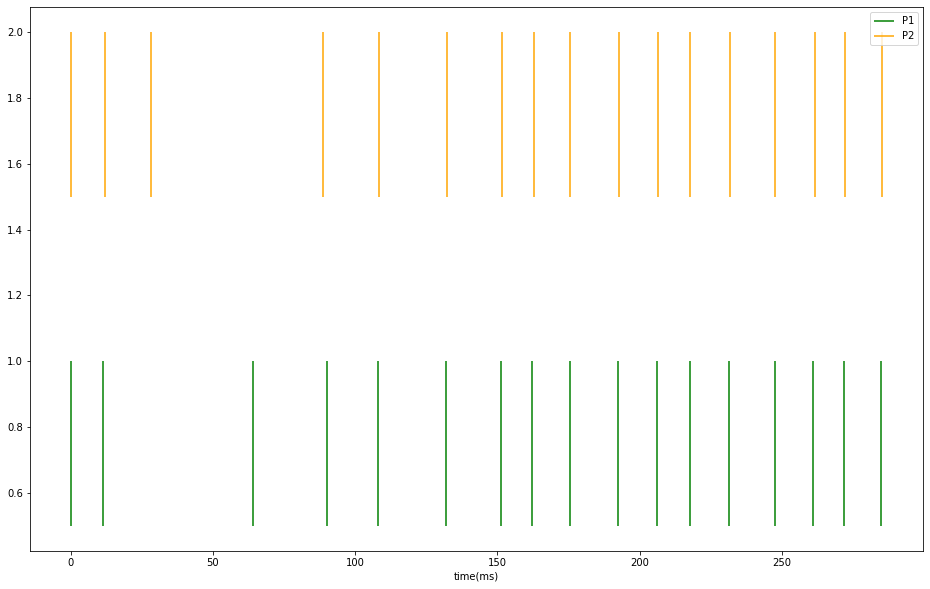

In [21]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(given_input_from_user):
    for i,cell in enumerate(L1.sets[j].cells):
        plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
plt1.xlabel('time(ms)')
plt1.legend(label)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

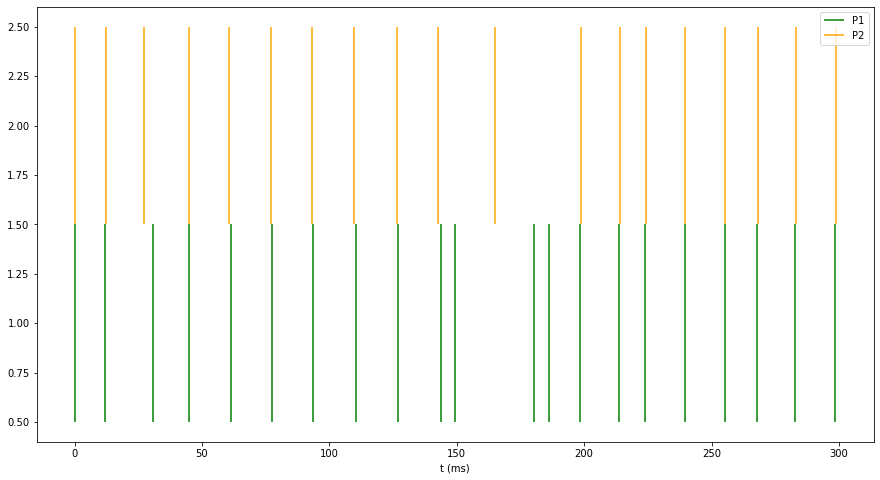

In [22]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(15,8))
for i,cell in enumerate(L1.sets[4].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1.5,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

### **Before learning Firing rate**

In [23]:
fr_P1=[0 for i in range(len(L1.sets))]
fr_P2=[0 for i in range(len(L1.sets))]
for f in range(len(L1.sets)):
  t=list(L1.sets[f].cells[0].spike_times)
  #print("spikes of p1", t)
  t1=list(L1.sets[f].cells[1].spike_times)
  #print("spikes of p2", t1)
  fr_P1[f]=(len(t)/100)*1000
  fr_P2[f]=(len(t1)/100)*1000
#print("frequencies of P1 in each set", fr_P1)
#print("frequencies of P2 in each set", fr_P2)

c=[0 for i in range(size*2)]
for i in range(size):
  c[i*2]=fr_P1[i]
  c[i*2+1]=fr_P2[i]
print("Frequencies of each neuron before learning", c)

Frequencies of each neuron before learning [170.0, 170.0, 190.0, 190.0, 210.0, 210.0, 220.0, 210.0, 210.0, 190.0, 220.0, 210.0, 210.0, 210.0, 190.0, 190.0, 170.0, 170.0, 200.0, 190.0, 180.0, 180.0, 210.0, 210.0, 200.0, 200.0, 190.0, 190.0, 200.0, 190.0, 220.0, 210.0, 220.0, 220.0, 200.0, 200.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 180.0, 180.0, 190.0, 190.0, 200.0, 180.0, 190.0, 190.0, 220.0, 210.0, 230.0, 200.0, 230.0, 220.0, 200.0, 190.0, 200.0, 200.0]


## Population Activity (Before Learning)

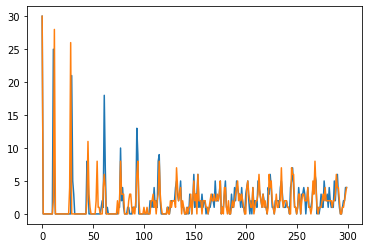

In [24]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

In [25]:
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.0011
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

### **Stage 9:Learning**

In [ ]:
epochs = 50
import numpy as np
import math
out_1_1_data = []
A_plus = 0.01      #0.2 to 2.5
A_minus = -0.01
tau_pre = 20*ms
tau_post = 20*ms

weights_rec = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
weights_rec_2 = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
L_weights_rec= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]
L_weights_rec_2= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]

for l in range(epochs):  
    print("\niteration no is",l)
    P1_data = []
    print("\nmutual learning")
    for i in range(len(L1.sets)):
        h.continuerun(300 *ms)
        out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
        # print("Spike times P{0}".format(1+i*2), list(L1.sets[i].P1.spike_times))
        spike_1_1 = list(L1.sets[i].P1.spike_times)
        out_1_2 = h.Vector().record(L1.sets[i].P2.dend(0.5)._ref_v)
        spike_1_2 = list(L1.sets[i].P2.spike_times)
        # print("Spike times P{0}".format(2+i*2), list(L1.sets[i].P2.spike_times))
        t = h.Vector().record(h._ref_t)
        h.finitialize(-70 * mV)
        
        for k in range(1,3):
            delta_t = [(spike_1_2[iter] - spike_1_1[iter]) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
            delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0.24 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
            delta_w = sum(delta_w_list)
            exec(f"L1.sets[i].nc{k}.weight[0] += delta_w")         
        P1_data.append(list(out_1_1))
        print("weight:", L1.sets[i].nc1.weight[0])
        weights_rec[i][l] = L1.sets[i].nc1.weight[0]
        weights_rec_2[i][l] = L1.sets[i].nc2.weight[0]    



#Lateral Learning
    print("\tlateral learning")
    for i in range(len(L1.sets)-1):
      h.continuerun(300 *ms)
      out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(1+2*i), list(L1.sets[i].P1.spike_times))
      spike_1_1 = list(L1.sets[i].P1.spike_times)
      out_2_1 = h.Vector().record(L1.sets[i+1].P1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(3+2*i), list(L1.sets[i+1].P1.spike_times))
      spike_2_1 = list(L1.sets[i+1].P1.spike_times)
      h.finitialize(-70 * mV)

      # change the deltas
      
      L1.netConArr[i][0].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)
      L1.netConArr[i][1].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)

      # Logging work

      print(L1.netConArr[i][0].weight[0])
      L_weights_rec[i][l] = L1.netConArr[i][0].weight[0]
      L_weights_rec[i][l] = L1.netConArr[i][1].weight[0]
      # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
      # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
      # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i], spike_M1_data[i+1])")
      # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i+1], spike_M1_data[i])")
      # print("lateral weight is : ",L1.nc11_0.weight[0])  
      # L_weights_rec[i][l] = L1.nc11_0.weight[0]
      # L_weights_rec_2[i][l]=L1.nc12_i.weight[0] 
      # exec(f"print(L1.nc11_{i}.weight[0])")
      # exec(f"L_weights_rec[i][l]=L1.nc11_{i}.weight[0]")
      # exec(f"L_weights_rec_2[i][l]=L1.nc12_{i}.weight[0]")

<IPython.core.display.Javascript object>

In [ ]:
print(sum([len(list(cell.cells[0].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))
print(sum([len(list(cell.cells[1].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))


<IPython.core.display.Javascript object>

0.0
0.0


In [ ]:
## TODO: Check what kind of distribution is followed by the output

**Stage 8: Record & visualize the voltage values at each axon and dendride after learning**

In [ ]:
recording_cell = L1.sets[2].P1
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
print(recording_cell.axon(0.5).v)
h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

-70.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
recording_cell = L1.sets[2].P2
axon_P1 = h.Vector().record(recording_cell.soma(0.5)._ref_v)
dend_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(100 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# change param to print more graphs
param = 1 
for iter in range(param):
  exec(f"f{iter} = plt2.figure(x_axis_label='epoch', y_axis_label='weights')")
  exec(f"x = [i for i in range(len(weights_rec[0]))]")
  exec(f"f{iter}.line(x, weights_rec[0], line_width=1, legend_label='pair.no.1', line_color='black')")
  exec(f"plt2.show(f{iter})")

## Population Activity

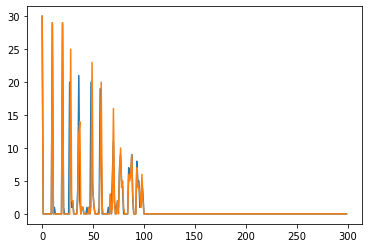

In [ ]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

In [ ]:
# count, bins, ignored = plt1.hist(weights_rec[0], 10)
# # Plot the distribution curve
# # plt1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.show()
# print(weights_rec[0])

In [ ]:
# f = plt2.figure(x_axis_label='epoch', y_axis_label='weights')
# x = [i for i in range(len(L_weights_rec[0]))]
# f.line(x, L_weights_rec[3], line_width=1, legend_label='nc11', line_color='blue')
# f.line(x, L_weights_rec_2[0], line_width=2, legend_label='nc12', line_color='red', line_dash='dotted')
# plt2.show(f)

### **Raster scan for short intervals**

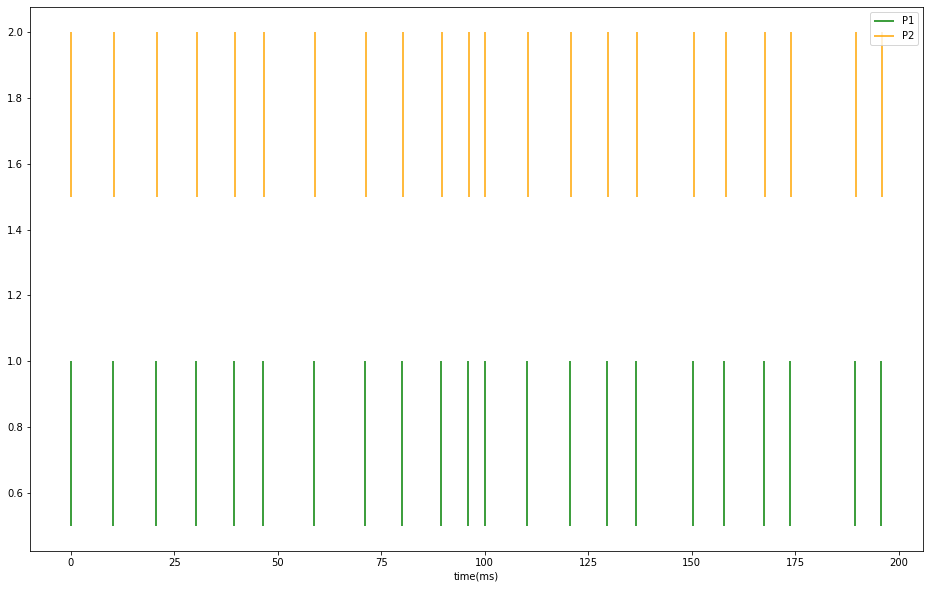

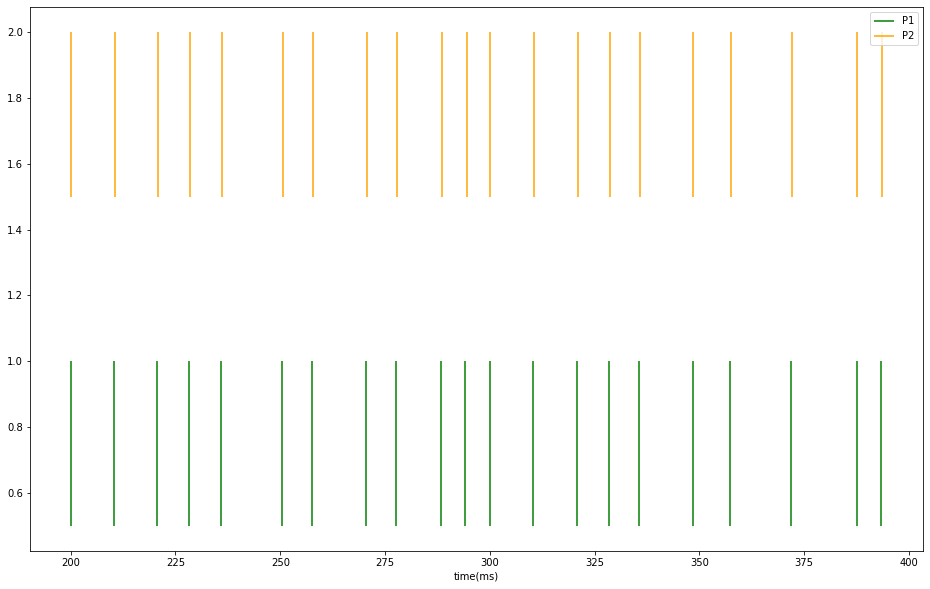

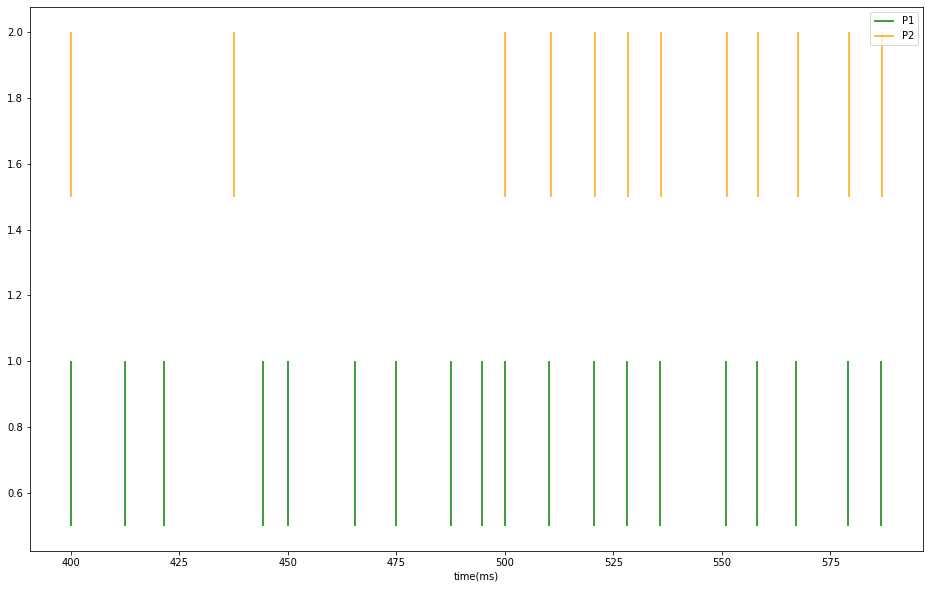

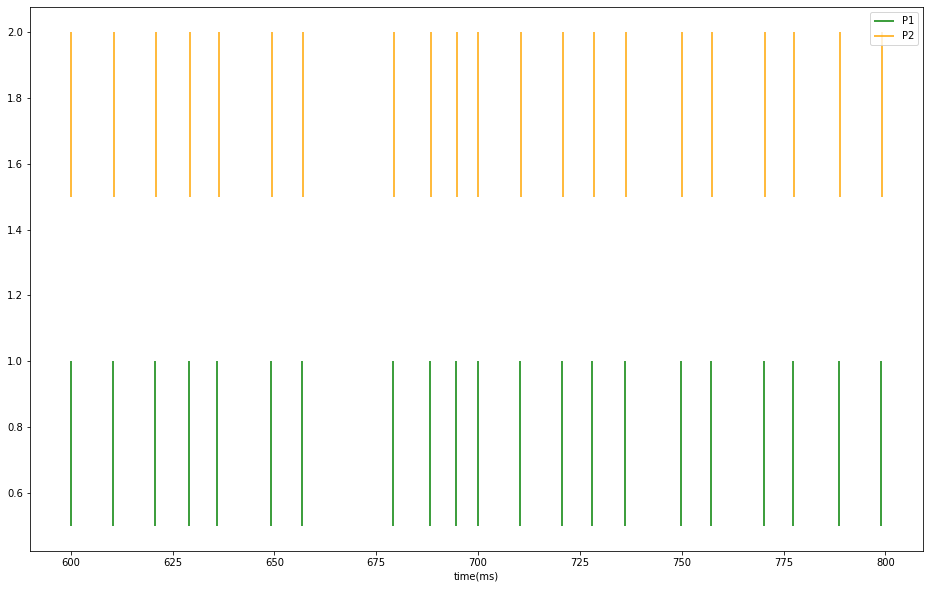

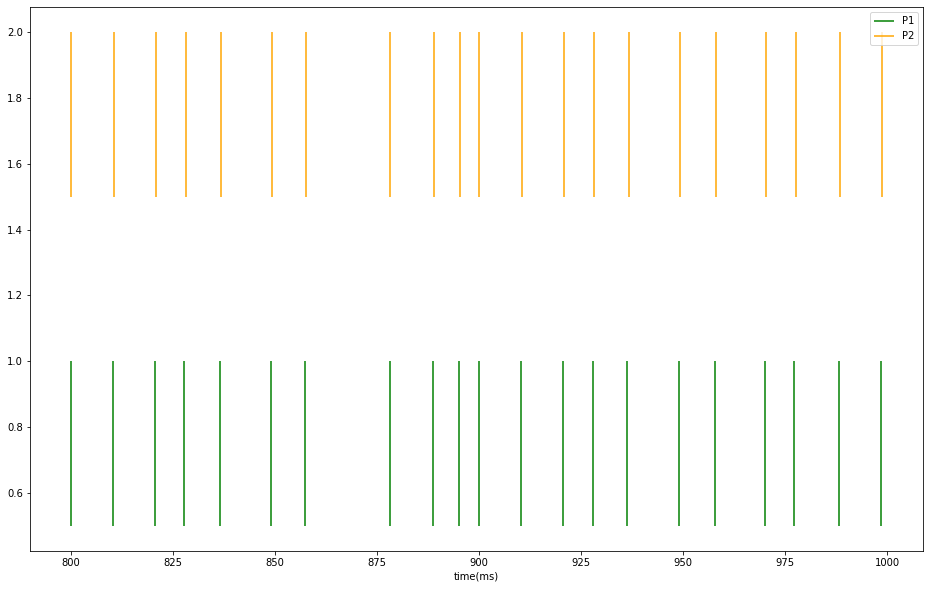

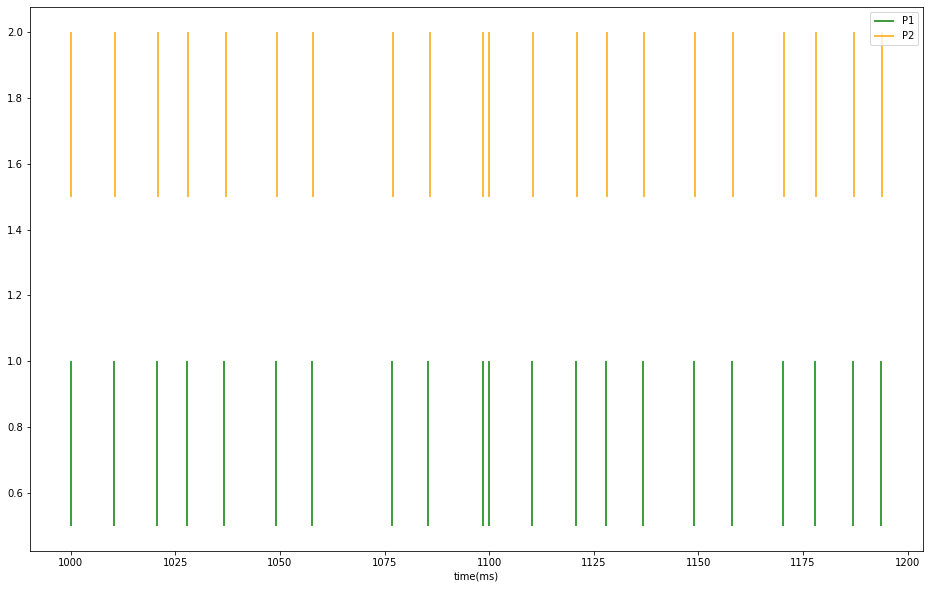

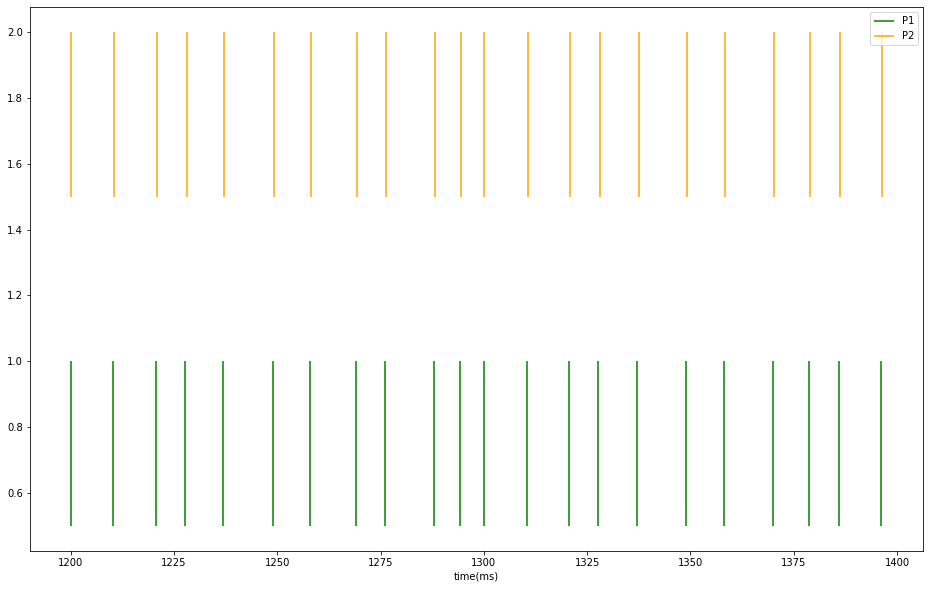

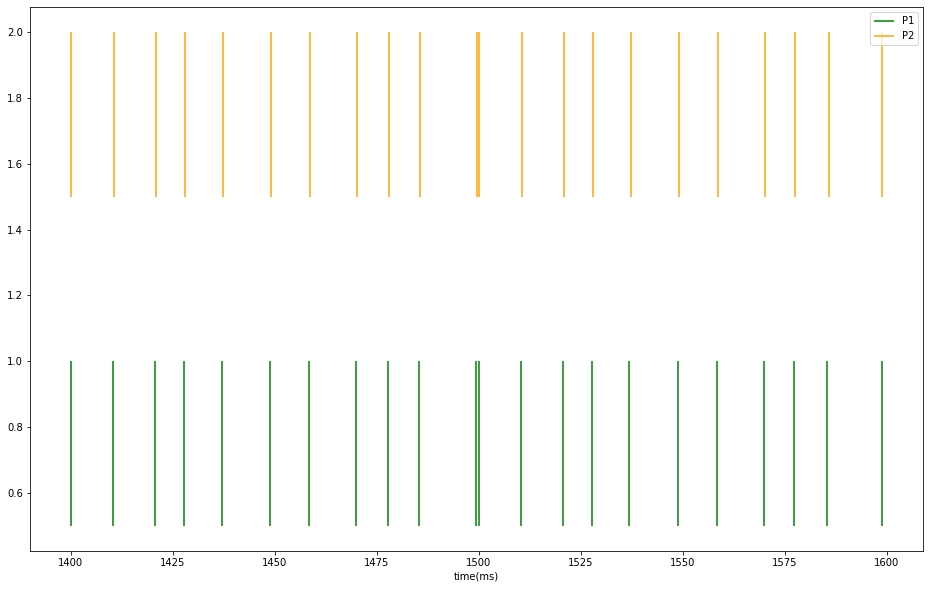

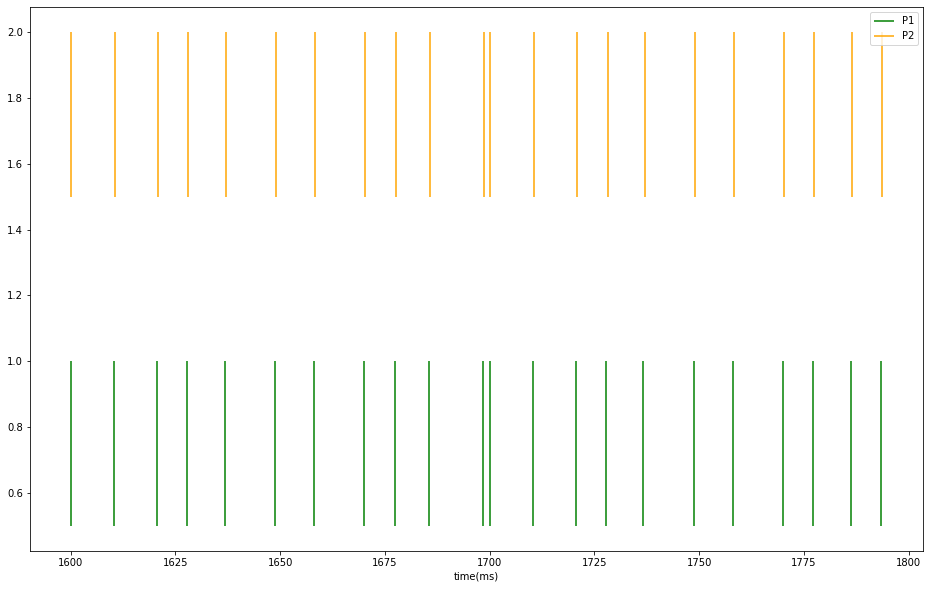

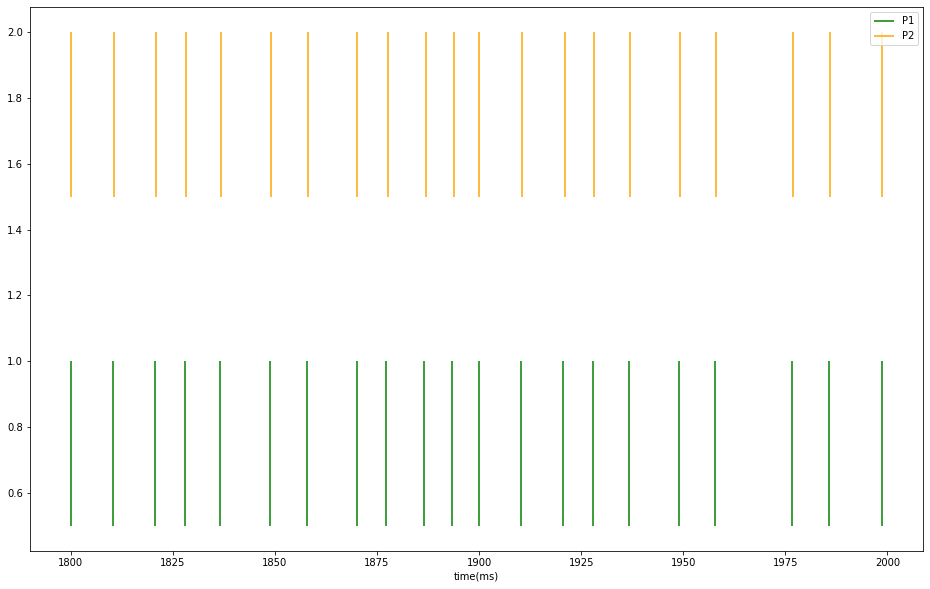

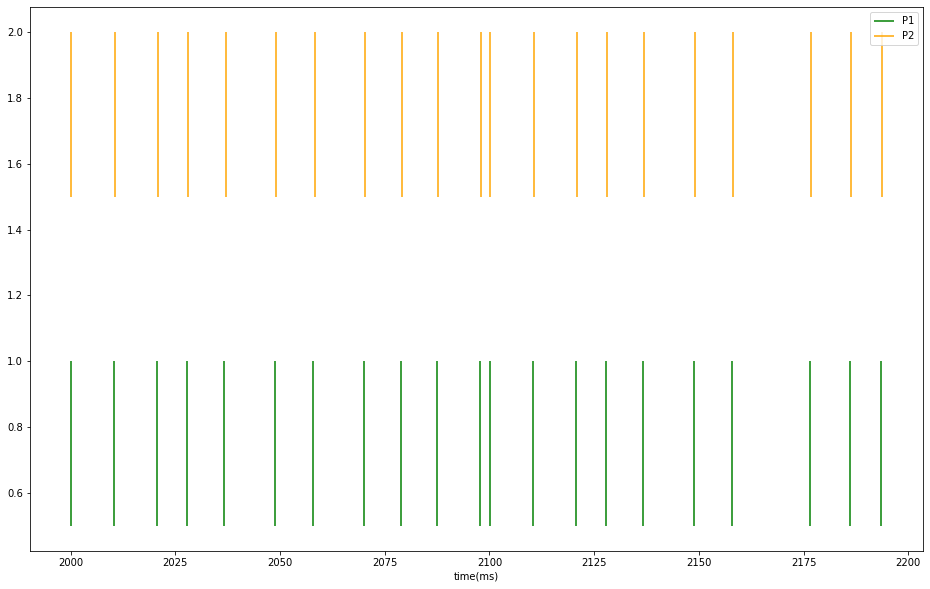

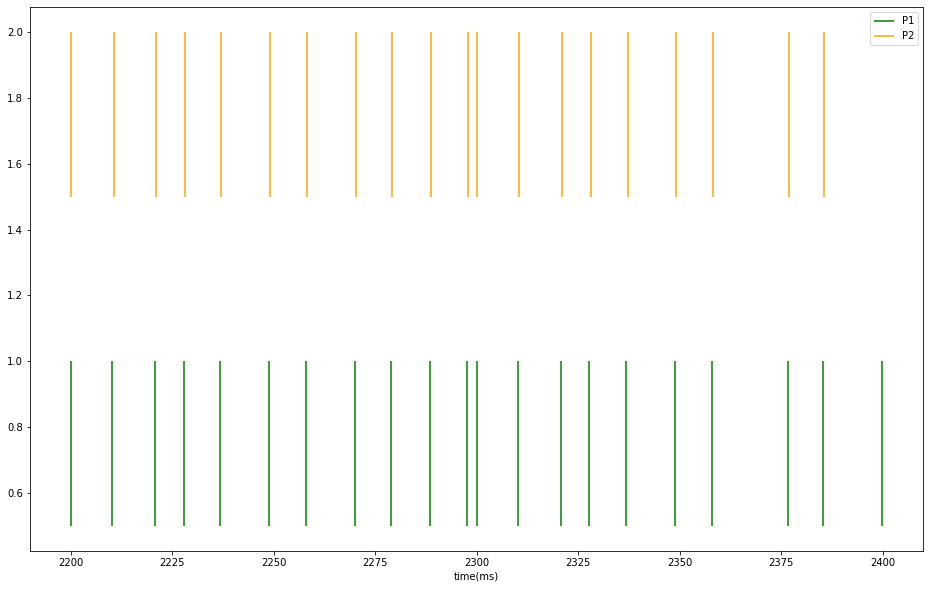

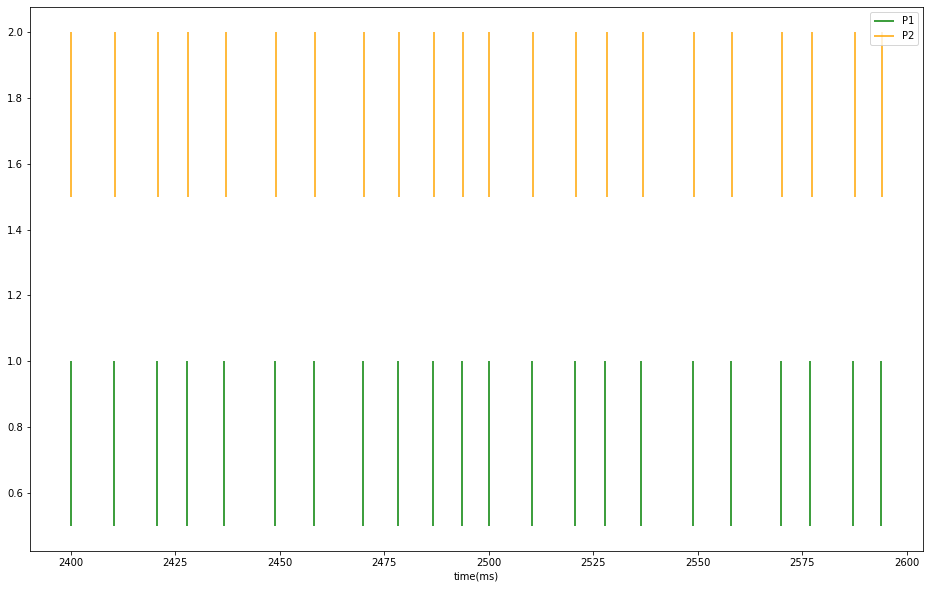

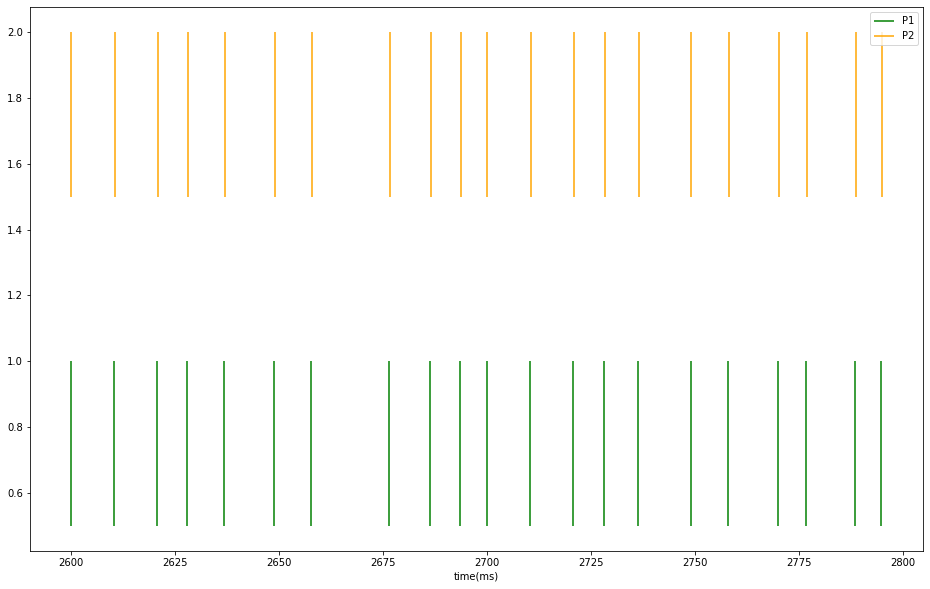

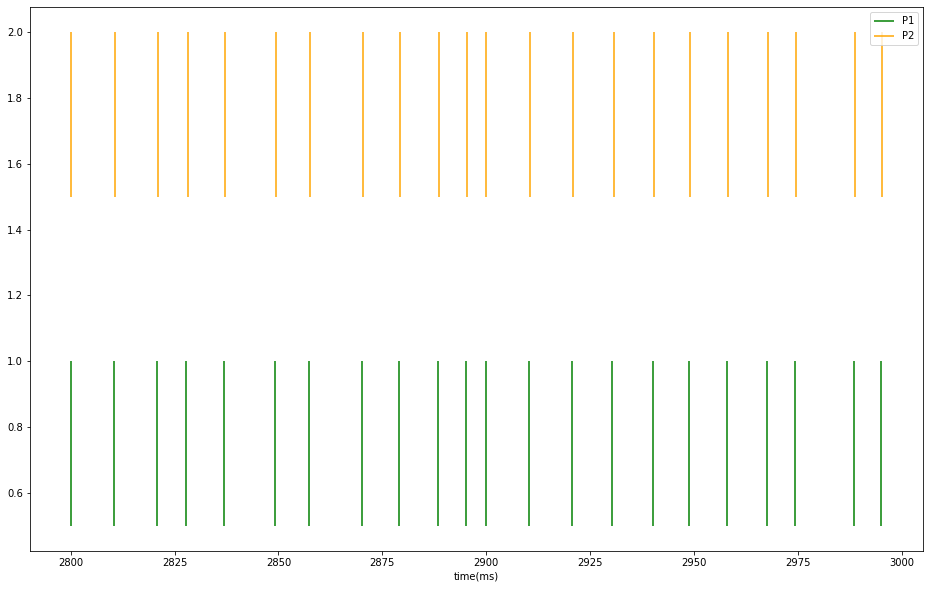

In [ ]:
interval=2 #no.of pairs for each raster scan(if interval is 1 each pair would be displayed individually)
start=0
end=interval
lis=int(size/end)
for k in range(lis):
  color=['green','orange']
  label=['P1','P2']
  plt1.figure(figsize=(16,10))
  for j in range(start,end):
      for i,cell in enumerate(L1.sets[j].cells):
          plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
  plt1.xlabel('time(ms)')
  plt1.legend(label)
  start=end
  end=end+interval


[0.025000000100000003, 10.250000000099952, 20.550000000099367, 30.275000000098814, 39.425000000100404, 46.375000000101984, 58.825000000104815, 71.0750000001076, 79.97500000010962, 89.52500000011179, 95.90000000011324]
[0.025000000100000003, 10.250000000099952, 20.550000000099367, 30.275000000098814, 39.425000000100404, 46.375000000101984, 58.825000000104815, 71.0750000001076, 79.97500000010962, 89.52500000011179, 95.90000000011324]


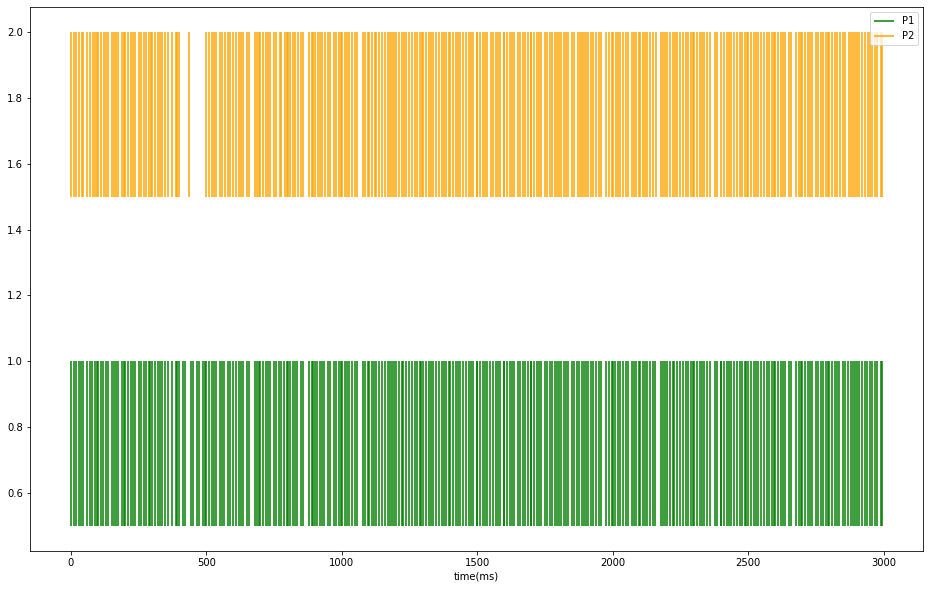

In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(given_input_from_user):
    for i,cell in enumerate(L1.sets[j].cells):
        plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
plt1.xlabel('time(ms)')
plt1.legend(label)
t1=list(L1.sets[0].cells[0].spike_times)
t2=list(L1.sets[0].cells[0].spike_times)
print(t1)
print(t2)

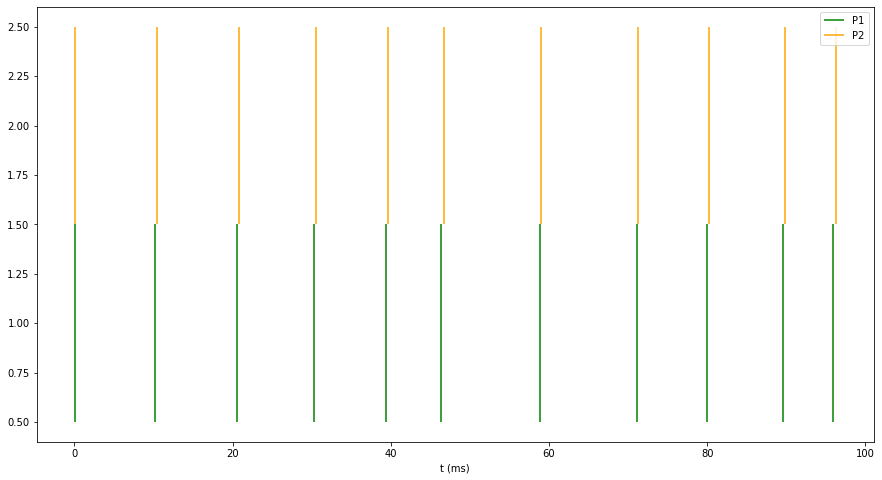

In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(15,8))
for i,cell in enumerate(L1.sets[0].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1.5,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

[0.08973494 0.06343923 0.08819897 0.05260418 0.05817606 0.07762186
 0.09424579 0.08788047 0.0839474  0.07941145 0.07420946 0.05765619
 0.08398786 0.07534169 0.08859966 0.07476264 0.08550335 0.094538
 0.09715068 0.09805683 0.07575172 0.07109023 0.09176883 0.07546926
 0.0593554  0.06848958 0.08900187 0.0747572  0.08512195 0.05391907
 0.05539942 0.06842732 0.06465242 0.0829822  0.05764698 0.0921811
 0.0609624  0.05732283 0.05645733 0.09116008 0.05613802 0.08276733
 0.06714674 0.08105091 0.05955788 0.09295125 0.07790207 0.05202378
 0.07661391 0.08167463 0.05454212 0.07720235 0.08447837 0.0526877
 0.05895473 0.06318215 0.09663737 0.09223801 0.09626783]
[6.9086942123286965, 5.641255976583398, 5.826901949850474, 4.6632358731889525, -0.4896726101599975, 5.405187600291493, 4.851369995947779, 5.2610102594262145, 5.188916866309317, 5.061034341347053, 5.245857649921435, 5.211979795748162, 5.092294330439796, 4.7343262429691775, 4.765222452232728, 4.995781778799309, 4.787061849081493, 5.242931515266

<Figure size 1152x648 with 0 Axes>

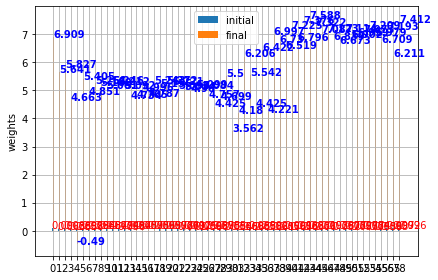

In [ ]:
n=2*size-1
final_weights=[0]*n
labels=range(2*size-1)
initial_weights =weights[0:n]
for i in range(size):
  final_weights[i]=weights_rec[i][-1]
"""
for i in range(size,2*size-1):
  final_weights.insert(i,weights[i])
"""
for i in range(size-1):
  final_weights[i+size]=L_weights_rec[i][-1]

#final_weights=final_weights[0:n]  

print(initial_weights)
print(final_weights)

plt1.figure(figsize=(16,9))
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
 
fig, ax = plt1.subplots()
rects1 = ax.bar(x - width/2,initial_weights, width, label='initial')
rects2 = ax.bar(x + width/2,final_weights , width, label='final')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('weights')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()
fig.tight_layout()
for i, v in enumerate(final_weights):
    ax.text(i,v, str(round(v,3)), color = 'blue', fontweight = 'bold')
for i, v in enumerate(initial_weights):
    ax.text(i-0.23,v, str(round(v,3)), color = 'red')
plt1.show()

### **After learning firing rate**

In [ ]:
fr_P1_1=[0 for i in range(len(L1.sets))]
fr_P2_1=[0 for i in range(len(L1.sets))]
c_1=[0 for i in range(size*2)]
for f in range(len(L1.sets)):
  t=list(L1.sets[f].cells[0].spike_times)
  t1=list(L1.sets[f].cells[1].spike_times)
  fr_P1_1[f]=(len(t)/100)*1000  # length of t= no.of spikes
  fr_P2_1[f]=(len(t1)/100)*1000
#print("frequencies of P1 in each set", fr_P1_1)
#print("frequencies of P2 in each set", fr_P2_1)
for i in range(size):
  c_1[i*2]=fr_P1_1[i]
  c_1[i*2+1]=fr_P2_1[i]
print("Frequencies of each neuron after learning", c_1)

Frequencies of each neuron after learning [110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 90.0, 20.0, 100.0, 100.0, 100.0, 100.0, 110.0, 110.0, 100.0, 100.0, 110.0, 110.0, 100.0, 100.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 110.0, 110.0, 100.0, 100.0, 110.0, 110.0, 100.0, 90.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 110.0, 110.0, 110.0, 110.0, 110.0, 110.0]


In [ ]:
neuron_name=[0 for i in range(size*2)]
import plotly.graph_objects as go

for i in range(2*size):
  neuron_name[i]="p{0}".format(i+1)
print(neuron_name)

fig = go.Figure()

fig.add_trace(go.Scatter(x=neuron_name, y=c, marker=dict(color="crimson", size=9), mode="markers", name="Before Lering"))


fig.add_trace(go.Scatter(x=neuron_name, y=c_1, marker=dict(color="green", size=9), mode="markers", name="After Learning"))

fig.update_layout(title="firing rate", xaxis_title="neuron", yaxis_title="Frequency")

print("Frequencies of each neuron before learning", c)
print("Frequencies of each neuron after learning", c_1)

fig.show()

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60']
Frequencies of each neuron before learning [170.0, 170.0, 190.0, 190.0, 210.0, 210.0, 220.0, 210.0, 210.0, 190.0, 220.0, 210.0, 210.0, 210.0, 190.0, 190.0, 170.0, 170.0, 200.0, 190.0, 180.0, 180.0, 210.0, 210.0, 200.0, 200.0, 190.0, 190.0, 200.0, 190.0, 220.0, 210.0, 220.0, 220.0, 200.0, 200.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 180.0, 180.0, 190.0, 190.0, 200.0, 180.0, 190.0, 190.0, 220.0, 210.0, 230.0, 200.0, 230.0, 220.0, 200.0, 190.0, 200.0, 200.0]
Frequencies of each neuron after learning [110.0, 110.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 90.0, 20.0, 100.0, 100.0,

<Figure size 1152x648 with 0 Axes>

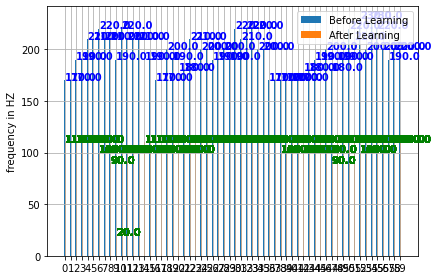

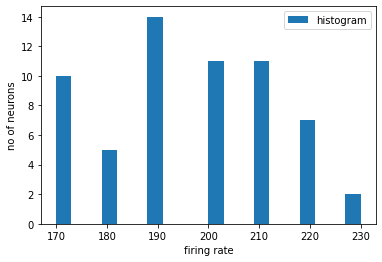

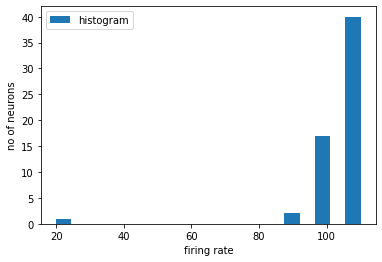

In [ ]:
label=['histogram']
n=size
labels=range(2*size)

plt1.figure(figsize=(16,9))
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
 
fig, ax = plt1.subplots()
rects1 = ax.bar(x - width/2,c, width, label='Before Learning')
rects1 = ax.bar(x + width/2,c_1, width, label='After Learning')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('frequency in HZ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()
fig.tight_layout()
for i, v in enumerate(c):
    ax.text(i,v, str(round(v,3)), color = 'blue', fontweight = 'bold')
    for i, v in enumerate(c_1):
      ax.text(i,v, str(round(v,3)), color = 'green', fontweight = 'bold')
plt1.show()

count, bins, ignored = plt1.hist(c, 20)
plt1.legend(label)
plt1.xlabel('firing rate')
plt1.ylabel('no of neurons')
plt1.show()

count, bins, ignored = plt1.hist(c_1, 20)
plt1.legend(label)
plt1.xlabel('firing rate')
plt1.ylabel('no of neurons')
plt1.show()


In [ ]:
"""
from scipy.stats import skew
plt1.hist(weights, bins=10)
print(weights)
print(skew(weights))
plt1.show()
"""

'\nfrom scipy.stats import skew\nplt1.hist(weights, bins=10)\nprint(weights)\nprint(skew(weights))\nplt1.show()\n'